#### 3.9 평균값의 차이 검정

##### 3.9.1 2집단 데이터에 대한 t검정
- 2개의 변수 사이에서 평균값에 차이가 있는지 판단
- ex.약을 먹기 전과 먹은 후 체온의 차이가 있는지 알아보는 경우
- ex.큰 바늘로 잡은 물고기와 작은 바늘로 잡은 물고기의 몸길이에 차이가 있는지 알아보는 경우

##### 3.9.2 대응표본 t검정
- 같은 대상을 다른 조건으로 2번 측정해서 차이를 볼 때 대응표본 t검정 사용
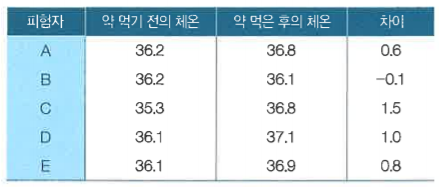
- 차이 열의 평균값이 0과 다르면 약을 먹기 전과 후의 체온이 다르다는 주장 가능
- 차잇값이 0과 유의미한 차이가 있는지를 판단해보자

##### 3.9.3 분석 준비

In [276]:
paired_test_data = pd.read_csv("3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


>귀무가설:약을 먹기 전과 후의 체온이 변하지 않는다 (차이 열의 평균값이 0과 유의미한 차이가 없다)  
>대립가설:약을 먹기 전과 후의 체온이 다르다
- 유의수준 5%로 설정
- p값이 0.05보다 작으면 귀무가설 기각(=약을 먹으면 체온이 유의미한 수준으로 변화한다)

##### 3.9.4 대응표본 t겁정(실습)
- 약을 먹기 전과 먹고 난 후의 체온의 차이를 계산하자

In [277]:
# 약을 먹기 전과 후의 표본평균
before = paired_test_data.query('medicine == "before"')["body_temperature"]
after = paired_test_data.query('medicine == "after"')["body_temperature"]
# 배열 형으로 변환
before = np.array(before)
after = np.array(after)
# 차이 계산
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

- 차잇값의 평균값이 0과 다른지 1집단 t검정으로 알아보자

In [278]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [279]:
# 간단하게 검정하는 함수가 있었다,,
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

##### 3.9.5 독립표본 t검정
- 대응표본 t검정은 데이터의 차이를 보고 1집단 t검정을 한다
- 독립표본 t검정은 '평균값의 차이'에 주목한다 

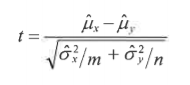

In [281]:
# 평균값
mean_bef = np.mean(before)
mean_aft = np.mean(after)
# 분산
sigma_bef = np.var(before, ddof=1)
sigma_aft = np.var(after, ddof=1)
#샘플사이즈
m = len(before)
n = len(after)
# t값
t_value = (mean_aft - mean_bef) / np.sqrt((sigma_bef/m+sigma_aft/n))
t_value

3.1557282344421034

In [283]:
# 분산이 다르다고 가정한 t검정(Welch검정)
stats.ttest_ind(after, before, equal_var=False) 

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

##### 3.9.7 독립표본 t검정(등분산)
- 등분산성이란 서로 다른 두 개 이상의 집단을 비교할 때 분산이 같음을 의미
- 일부러 등분산이 무엇인지 알아볼필요 없이 t검정 사용해도 상관없음

##### 3.9.8 p해킹
- p값을 자의적으로 변화시킴
- 원하는 값을 얻지 못했다면?
- 유의미한 차이를 얻을 때 까지 조건을 바꿔가며 여러번 시행